### Code to Generate Complex Dataset:

In [1]:
import numpy as np
import pandas as pd

# Define the number of samples
num_samples = 50000

# Simulate material composition (starch, cellulose, plasticizers, crosslinking agents)
starch = np.random.uniform(10, 70, num_samples)  # Starch percentage (10% to 70%)
cellulose = np.random.uniform(10, 70, num_samples)  # Cellulose percentage (10% to 70%)
plasticizers = np.random.uniform(0, 30, num_samples)  # Plasticizers percentage (0% to 30%)
crosslinking_agents = np.random.uniform(0, 20, num_samples)  # Crosslinking agents (0% to 20%)

# Simulate processing conditions
print_temp = np.random.uniform(180, 250, num_samples)  # Printing temperature (180°C to 250°C)
print_speed = np.random.uniform(10, 40, num_samples)  # Print speed (10 to 40 mm/s)
curing_time = np.random.uniform(30, 120, num_samples)  # Curing time (30 to 120 mins)

# Simulate environmental conditions
humidity = np.random.uniform(30, 80, num_samples)  # Humidity percentage (30% to 80%)
uv_exposure = np.random.uniform(0, 1, num_samples)  # UV exposure (0 to 1, where 1 is high)

# Define the relationships for tensile strength (complex and nonlinear)
tensile_strength = (
    0.4 * starch + 0.3 * cellulose + 0.1 * plasticizers + 0.15 * crosslinking_agents +
    0.2 * print_temp + 0.25 * print_speed - 0.1 * curing_time +
    np.random.normal(0, 5, num_samples)  # Add some noise to simulate real-world data
)

# Define the relationships for biodegradability (complex and nonlinear)
biodegradability = (
    0.3 * cellulose + 0.2 * plasticizers + 0.1 * crosslinking_agents + 0.1 * uv_exposure -
    0.15 * humidity + np.random.normal(0, 0.05, num_samples)  # Small noise for biodegradability
)

# Ensure biodegradability stays within [0, 1]
biodegradability = np.clip(biodegradability, 0, 1)

# Create the DataFrame
df = pd.DataFrame({
    'starch': starch,
    'cellulose': cellulose,
    'plasticizers': plasticizers,
    'crosslinking_agents': crosslinking_agents,
    'print_temp': print_temp,
    'print_speed': print_speed,
    'curing_time': curing_time,
    'humidity': humidity,
    'uv_exposure': uv_exposure,
    'tensile_strength': tensile_strength,
    'biodegradability': biodegradability
})

# Save to CSV
df.to_csv('biomaterial_data_advanced.csv', index=False)

# Display the first few rows of the dataset
print(df.head())

      starch  cellulose  plasticizers  crosslinking_agents  print_temp  \
0  23.257871  14.613711      5.048073            13.433439  204.406778   
1  59.507443  58.628008      4.002132             2.469423  192.735216   
2  60.533357  40.794222     22.252380            18.806266  219.388454   
3  31.751917  65.980201     15.978237             9.975782  235.105591   
4  63.779884  51.797805     20.706775            19.203655  249.424658   

   print_speed  curing_time   humidity  uv_exposure  tensile_strength  \
0    26.183285    40.218769  79.341252     0.368190         56.468548   
1    25.233816    72.543732  30.327928     0.611608         78.146229   
2    25.993177    38.050111  73.769347     0.069774         85.313235   
3    38.995147   107.793779  47.363734     0.937230         83.293780   
4    35.291157    64.607157  73.047438     0.079954        101.178874   

   biodegradability  
0               0.0  
1               1.0  
2               1.0  
3               1.0  
4     

### Training the Model


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
# df = pd.read_csv('biomaterial_data_advanced.csv')

# Split features (X) and target variables (y)
X = df.drop(columns=['tensile_strength', 'biodegradability'])
y_strength = df['tensile_strength']
y_biodegradability = df['biodegradability']

# Handle missing values (if any) using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_strength, y_test_strength, y_train_biodegradability, y_test_biodegradability = train_test_split(
    X_scaled,  # Features
    y_strength,  # First target variable (tensile_strength)
    y_biodegradability,  # Second target variable (biodegradability)
    test_size=0.2,  # 80% for training, 20% for testing
    random_state=42  # For reproducibility
)

# Print out the shape of the training and test sets to verify
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (40000, 9)
Test data shape: (10000, 9)


In [3]:
y_train_strength

,tensile_strength
39087,95.320199
30893,53.608833
45278,72.971623
16398,84.813145
13653,74.511347
...,...
11284,63.363827
44732,64.299443
38158,51.111860
860,95.321944


In [4]:
y_train_biodegradability

,biodegradability
39087,1.0
30893,0.0
45278,1.0
16398,1.0
13653,1.0
...,...
11284,1.0
44732,1.0
38158,1.0
860,1.0


### Model Trainning

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest models for both targets
model_strength = RandomForestRegressor(n_estimators=100, random_state=42)
model_biodegradability = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model for tensile strength (y_strength)
model_strength.fit(X_train, y_train_strength)

# Train the model for biodegradability (y_biodegradability)
model_biodegradability.fit(X_train, y_train_biodegradability)

# Make predictions on the test set
y_pred_strength = model_strength.predict(X_test)
y_pred_biodegradability = model_biodegradability.predict(X_test)

# Evaluate the models using MSE and R² for both targets

# Tensile Strength Model Evaluation
mse_strength = mean_squared_error(y_test_strength, y_pred_strength)
r2_strength = r2_score(y_test_strength, y_pred_strength)

# Biodegradability Model Evaluation
mse_biodegradability = mean_squared_error(y_test_biodegradability, y_pred_biodegradability)
r2_biodegradability = r2_score(y_test_biodegradability, y_pred_biodegradability)

# Print evaluation results
print("Tensile Strength Model Evaluation:")
print(f"MSE: {mse_strength}")
print(f"R²: {r2_strength}")

print("\nBiodegradability Model Evaluation:")
print(f"MSE: {mse_biodegradability}")
print(f"R²: {r2_biodegradability}")

Tensile Strength Model Evaluation:
MSE: 26.405538188406762
R²: 0.7941907146331364

Biodegradability Model Evaluation:
MSE: 0.004027962096860426
R²: 0.9596506171346904


### DNN Model

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# DNN Model for Tensile Strength
model_strength = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer (single neuron for regression)
])

# Compile the model
model_strength.compile(optimizer='adam', loss='mean_squared_error')

# DNN Model for Biodegradability
model_biodegradability = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer (single neuron for regression)
])

# Compile the model
model_biodegradability.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Train the tensile strength model
history_strength = model_strength.fit(X_train, y_train_strength, epochs=40, batch_size=32, validation_data=(X_test, y_test_strength))

# Train the biodegradability model
history_biodegradability = model_biodegradability.fit(X_train, y_train_biodegradability, epochs=40, batch_size=32, validation_data=(X_test, y_test_biodegradability))


Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1419.2136 - val_loss: 57.5258
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 48.4181 - val_loss: 30.9872
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 29.5543 - val_loss: 26.1618
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 26.8216 - val_loss: 25.1496
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25.9917 - val_loss: 24.6376
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 25.8340 - val_loss: 24.9782
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 25.6158 - val_loss: 25.3287
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 26.0548 - val_loss: 25.8836
Epoch 9/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 25.9563 - val_loss: 25.1503
Epoch 10/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25.6740 - val_loss: 25.7614
Epoch 11/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25.5266 - val_loss: 25.3421
Epoch 

In [9]:
# Predict with the tensile strength model
y_pred_strength_nn = model_strength.predict(X_test)

# Predict with the biodegradability model
y_pred_biodegradability_nn = model_biodegradability.predict(X_test)

# Evaluate the tensile strength model
mse_strength_nn = mean_squared_error(y_test_strength, y_pred_strength_nn)
r2_strength_nn = r2_score(y_test_strength, y_pred_strength_nn)

# Evaluate the biodegradability model
mse_biodegradability_nn = mean_squared_error(y_test_biodegradability, y_pred_biodegradability_nn)
r2_biodegradability_nn = r2_score(y_test_biodegradability, y_pred_biodegradability_nn)

# Print results
print("Tensile Strength Model (DNN) Evaluation:")
print(f"MSE: {mse_strength_nn}")
print(f"R²: {r2_strength_nn}")

print("\nBiodegradability Model (DNN) Evaluation:")
print(f"MSE: {mse_biodegradability_nn}")
print(f"R²: {r2_biodegradability_nn}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Tensile Strength Model (DNN) Evaluation:
MSE: 24.650833590972564
R²: 0.8078671826774968

Biodegradability Model (DNN) Evaluation:
MSE: 0.00046256694397858153
R²: 0.9953663191771402


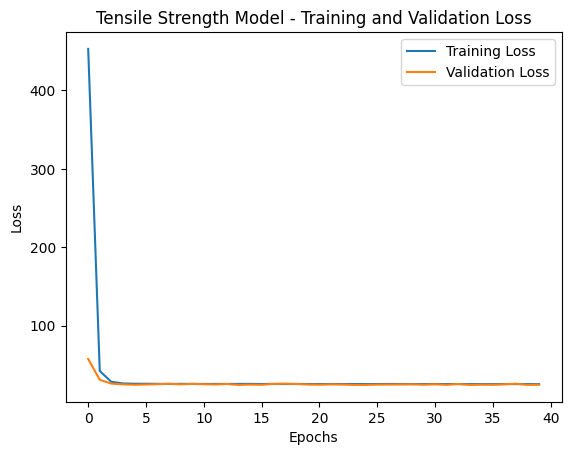

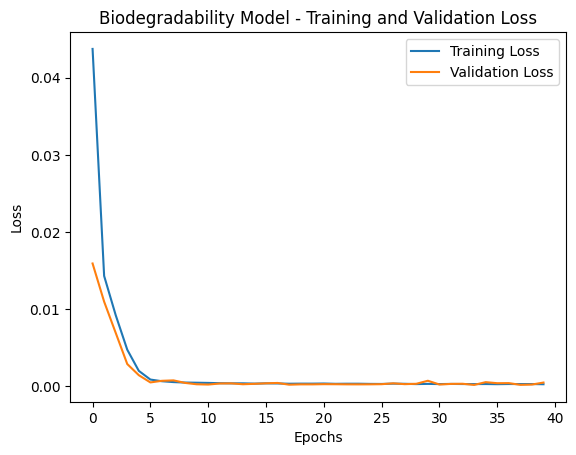

In [10]:
# Plotting the training history for tensile strength
import matplotlib.pyplot as plt

plt.plot(history_strength.history['loss'], label='Training Loss')
plt.plot(history_strength.history['val_loss'], label='Validation Loss')
plt.title('Tensile Strength Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training history for biodegradability
plt.plot(history_biodegradability.history['loss'], label='Training Loss')
plt.plot(history_biodegradability.history['val_loss'], label='Validation Loss')
plt.title('Biodegradability Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Save The Best Models

In [13]:
model_strength.save('model_strength_nn.keras')
model_biodegradability.save('model_biodegradability_nn.keras')